### Action1：购物篮词云分析
数据集：MarketBasket

下载地址：https://www.kaggle.com/dragonheir/basket-optimisation

对数据集进行词云可视化展示，可视化探索（Top10的商品有哪些）

In [1]:
import pandas as pd
from nltk import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Market_Basket_Optimisation.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
transactions = []
item_count = {}
for i in range(0,data.shape[0]):
    temp = []
    for j in range(0,data.shape[1]):
        item = data.values[i,j]
        if str(item) != 'nan':
            temp.append(item)
            if item not in item_count:
                item_count[item] = 1
            else:
                item_count[item] += 1
    transactions.append(temp)

In [4]:
def create_word_cloud(f):
    # f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    return wordcloud

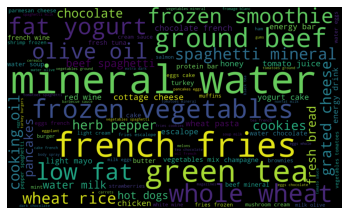

In [5]:
all_word = ' '.join('%s' %item for item in transactions)
wordcloud = create_word_cloud(all_word)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [6]:
best_items = sorted(item_count.items(), key = lambda x:x[1], reverse = True)[:10]
best_items = pd.DataFrame(best_items,columns=['item','count'])
best_items.index = best_items.index + 1
best_items

,item,count
1,mineral water,1788
2,eggs,1348
3,spaghetti,1306
4,french fries,1282
5,chocolate,1230
6,green tea,991
7,milk,972
8,ground beef,737
9,frozen vegetables,715
10,pancakes,713
